In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_parquet('bitacora_completa3.parquet')
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5780399 entries, 0 to 5780398
Data columns (total 27 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   OperationId            object        
 1   Url                    object        
 2   TimeGenerated          object        
 3   TimeGenerated1         object        
 4   Message                object        
 5   SeverityLevel          int64         
 6   Properties             object        
 7   OperationName          object        
 8   OperationId1           object        
 9   ParentId               object        
 10  SessionId              object        
 11  UserId                 object        
 12  AppRoleInstance        object        
 13  ClientCity             object        
 14  ClientStateOrProvince  object        
 15  ClientCountryOrRegion  object        
 16  ItemCount              int64         
 17  fecha                  datetime64[ns]
 18  Prop_SessionId        

In [23]:
df['UserId'].value_counts().head(100)  


UserId
cmQZCBkGUdnd7P9G5YoH1H    1062885
q3jl0z2ceDGReWSeifyTrj     537725
i3Mw16UVRcIX8qoU+AU1ax     429955
9yfwFZ9eV2XSu68j+x6u4k     411840
VPsWGOPreqtrgou6ozieGk     406125
f3nwAjsN/2rI3xlY0n8rEv     365189
+nrFPKH2ux3G0j6RH5YyaP     343387
7HudNhG1J8x5OP0Ri4eRwd     222951
LA0WijLplan4jeVGhn8jpK     220210
PVdn/PDK7JxCnS+cj4tDSb     206118
ZaBjWQjAvYSSvNn2+19Nuj     185400
47OIDco1J5gJUGmnJLyLIZ     166250
nm4lPB3QyfwUdNMqpBms22     132783
25PxCZ2TgbtBbmKDrHXyov     124949
v6f34bjCzzHn+kZf0smNXf     117358
3S5lDoSKt3smLlJRkI6DbI     111816
p/GTo4y2rAZABuaaKUldkI     109091
tnr5w5YKWmBCjUJIXYx1BK     107436
ol1drtCppvwFy5JZ86fOxu     106628
+UbBWUPU5GBHCYijaZ+Pwq      64045
9Q6MIIV7Q5Ss1pVY93CXHJ      60067
1QDvRHE4SdTojA9/7mlaqj      57951
/pDztJyFZcNzb9++EERH9q      50616
fvq8N8zAUjhz1WaRCxiNi0      40320
QGMfHjSl3LjrOtRhqwFAhA      36699
COgz33UxLR8cn8AgKS0DHB      14590
GZOx669w36zutdjFnpWbWm      13156
/juWrenWyCbyd5KEtM1xMD      12240
8yGLRBij0giFwV3wUFmcwy       8955
J5EtA1Y

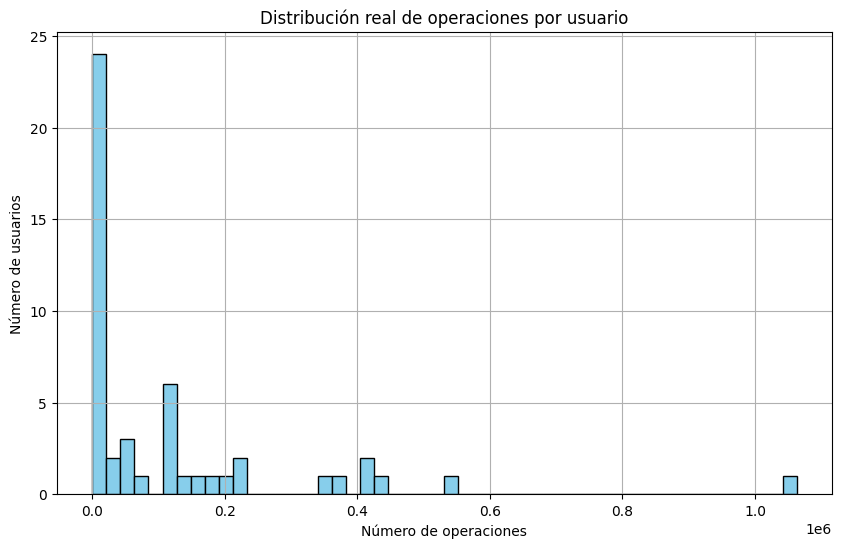

In [35]:
user_counts = df['UserId'].value_counts()

plt.figure(figsize=(10,6))
plt.hist(user_counts, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Número de operaciones')
plt.ylabel('Número de usuarios')
plt.title('Distribución real de operaciones por usuario')
plt.grid(True)
plt.show()


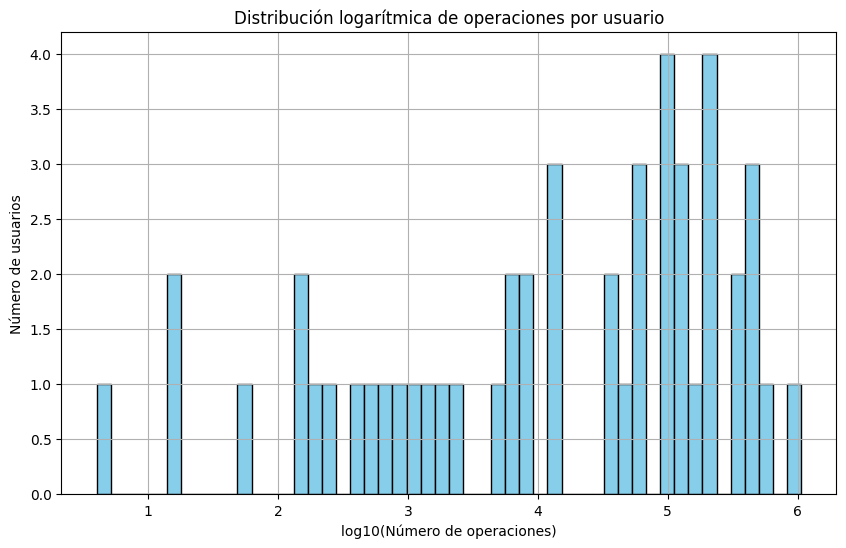

In [11]:

user_counts = df['UserId'].value_counts()
plt.figure(figsize=(10,6))
plt.hist(np.log10(user_counts), bins=50, color='skyblue', edgecolor='black')
plt.xlabel('log10(Número de operaciones)')
plt.ylabel('Número de usuarios')
plt.title('Distribución logarítmica de operaciones por usuario')
plt.grid(True)
plt.show()


C:\Users\humbe\AppData\Local\Temp\ipykernel_30052\1076372390.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['hour'] = df_top['TimeGenerated'].dt.hour


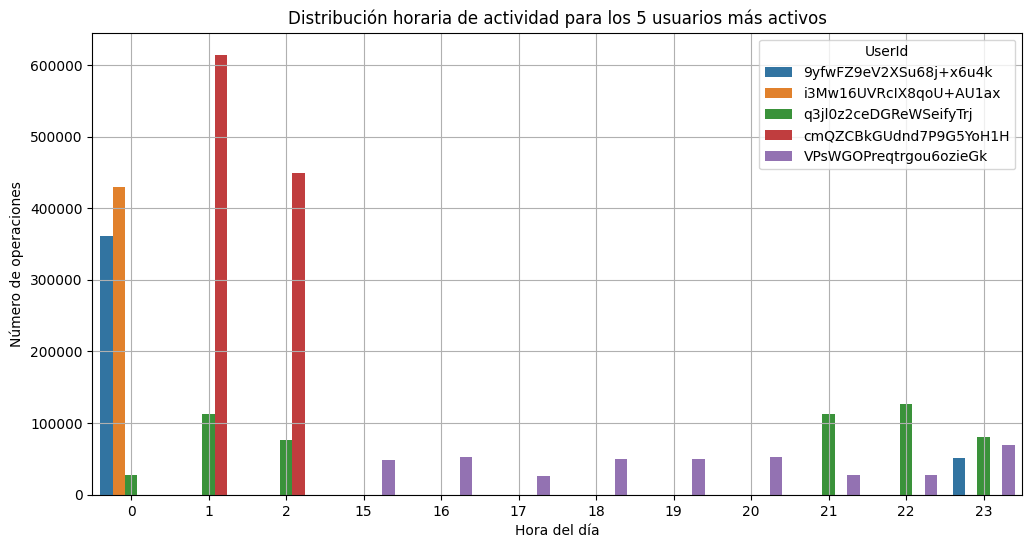

In [39]:
top_users = user_counts.head(5).index
df['TimeGenerated'] = pd.to_datetime(df['TimeGenerated'])
df_top = df[df['UserId'].isin(top_users)]
df_top['hour'] = df_top['TimeGenerated'].dt.hour


plt.figure(figsize=(12,6))
sns.countplot(data=df_top, x='hour', hue='UserId')
plt.title('Distribución horaria de actividad para los 5 usuarios más activos')
plt.xlabel('Hora del día')
plt.ylabel('Número de operaciones')
plt.legend(title='UserId')
plt.grid(True)
plt.show()


In [41]:
# Contar días distintos de acceso por usuario
dias_por_usuario = (
    df[df['UserId'].isin(top_users)]
    .groupby('UserId')['fecha']
    .nunique()
    .sort_values(ascending=False)
)

print(dias_por_usuario)

UserId
i3Mw16UVRcIX8qoU+AU1ax    46
9yfwFZ9eV2XSu68j+x6u4k    21
cmQZCBkGUdnd7P9G5YoH1H    17
q3jl0z2ceDGReWSeifyTrj    14
VPsWGOPreqtrgou6ozieGk    12
Name: fecha, dtype: int64


C:\Users\humbe\AppData\Local\Temp\ipykernel_30052\3821664771.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sospechoso['TimeGenerated'] = pd.to_datetime(df_sospechoso['TimeGenerated'])
C:\Users\humbe\AppData\Local\Temp\ipykernel_30052\3821664771.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sospechoso['Hora'] = df_sospechoso['TimeGenerated'].dt.hour


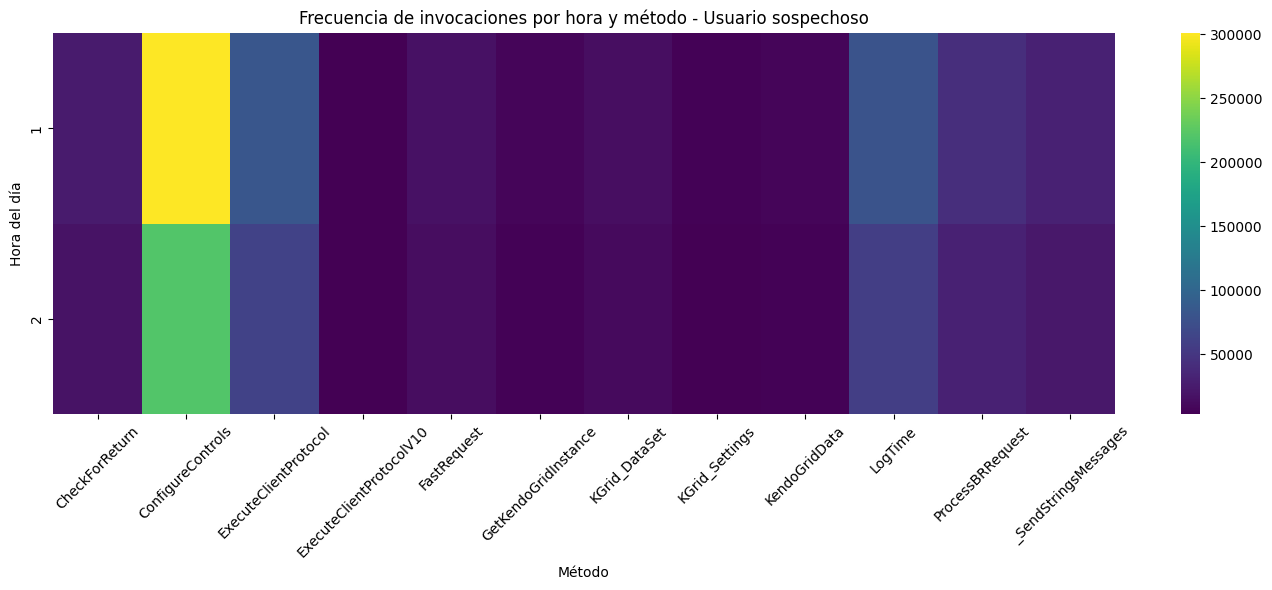

In [42]:
df_sospechoso = df[df['UserId'] == 'cmQZCBkGUdnd7P9G5YoH1H']


# Asegurarse de que la columna sea tipo datetime
df_sospechoso['TimeGenerated'] = pd.to_datetime(df_sospechoso['TimeGenerated'])

# Extraer la hora de la columna TimeGenerated
df_sospechoso['Hora'] = df_sospechoso['TimeGenerated'].dt.hour

# Crear una tabla de frecuencia por hora y método
pivot = df_sospechoso.pivot_table(
    index='Hora',
    columns='Prop_MethodName',
    values='OperationId',
    aggfunc='count',
    fill_value=0
)

# Graficar el heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(pivot, cmap='viridis')
plt.title('Frecuencia de invocaciones por hora y método - Usuario sospechoso')
plt.ylabel('Hora del día')
plt.xlabel('Método')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [44]:
df['ClientCountryOrRegion'].value_counts().head(10)


ClientCountryOrRegion
Mexico            5642489
United States      136408
United Kingdom       1502
Name: count, dtype: int64

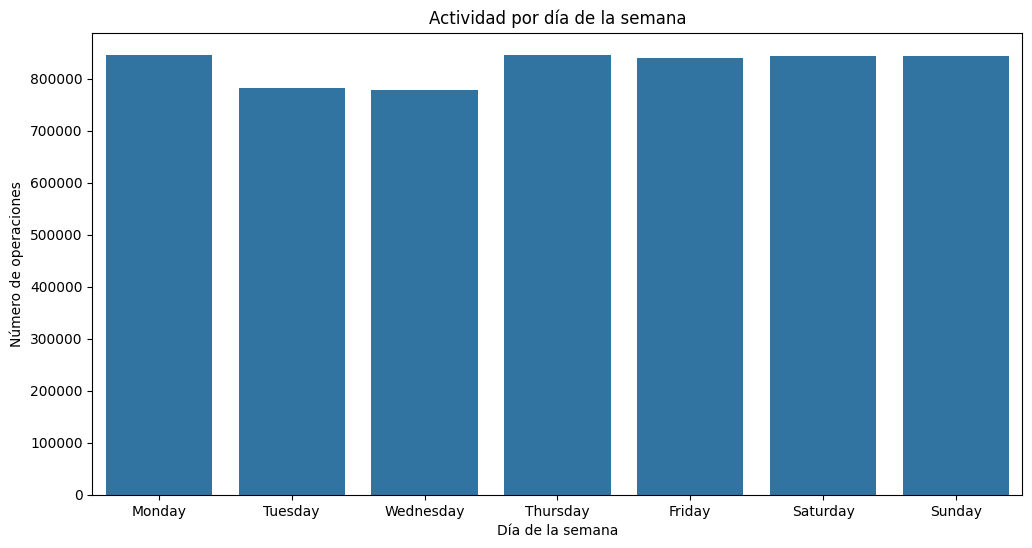

In [45]:
df['weekday'] = df['fecha'].dt.day_name()

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='weekday', 
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Actividad por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Número de operaciones')
plt.show()
